### Dataset Information
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Problem Statement 
Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers etc. are being smartly handled using data science techniques. As the name suggests this data comprises of transaction records of sales store. This is a regrssion problem.

### Variable  Description
### Item_Identifier - Unique product ID
### Item_Weight - Weight of product
### Item_Fat_Content - Whether the product is low fat or not
### Item_Visibility	- The % of total display area of all products in a store allocated to the particular                                             product
### Item_Type - The category to which the product belongs
### Item_MRP - Maximum Retail Price (list price) of the product
### Outlet_Identifier - Unique store ID
### Outlet_Establishment_Year - The year in which store was established
### Outlet_Size - The size of the store in terms of ground area covered
### Outlet_Location_Type - The type of city in which the store is located
### Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket
### Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be                                               predicted.

### Importing Liabraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

### Reading the Data

In [2]:
df = pd.read_csv('Big_Mart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Making a Copy of Original Data
data = df.copy()

### Exploratory Data Analysis

In [4]:
# Datatype of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Shape of data
data.shape

(8523, 12)

In [6]:
# Statistical Info
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


D:\Users\Lenovo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


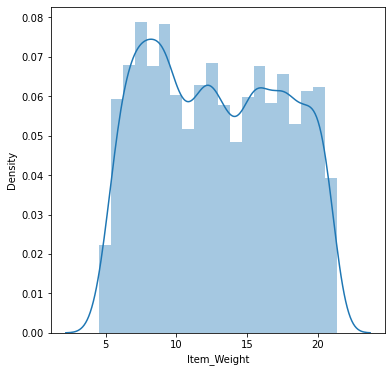

In [7]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

D:\Users\Lenovo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


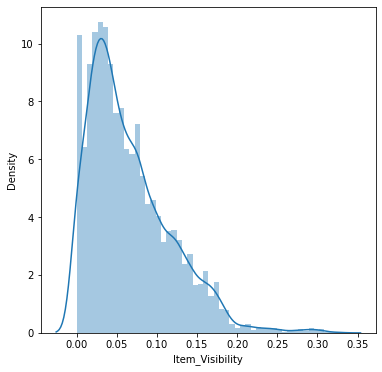

In [8]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

D:\Users\Lenovo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


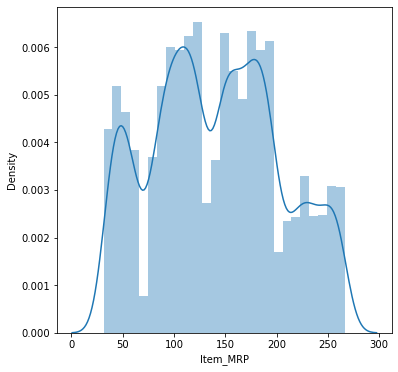

In [9]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

D:\Users\Lenovo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


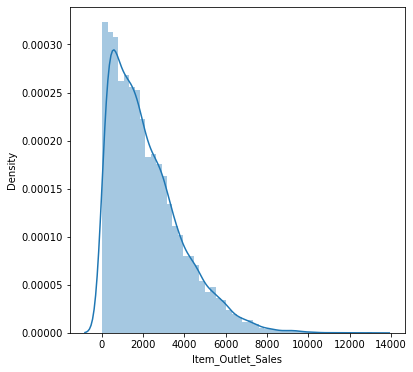

In [10]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

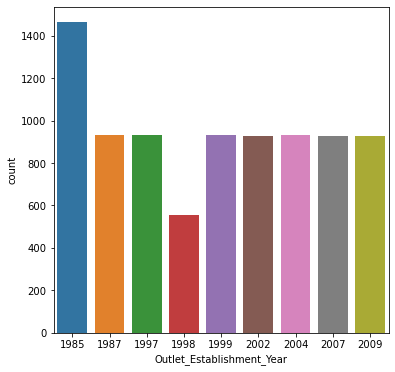

In [11]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

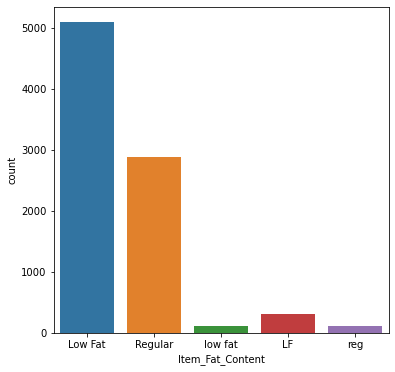

In [12]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

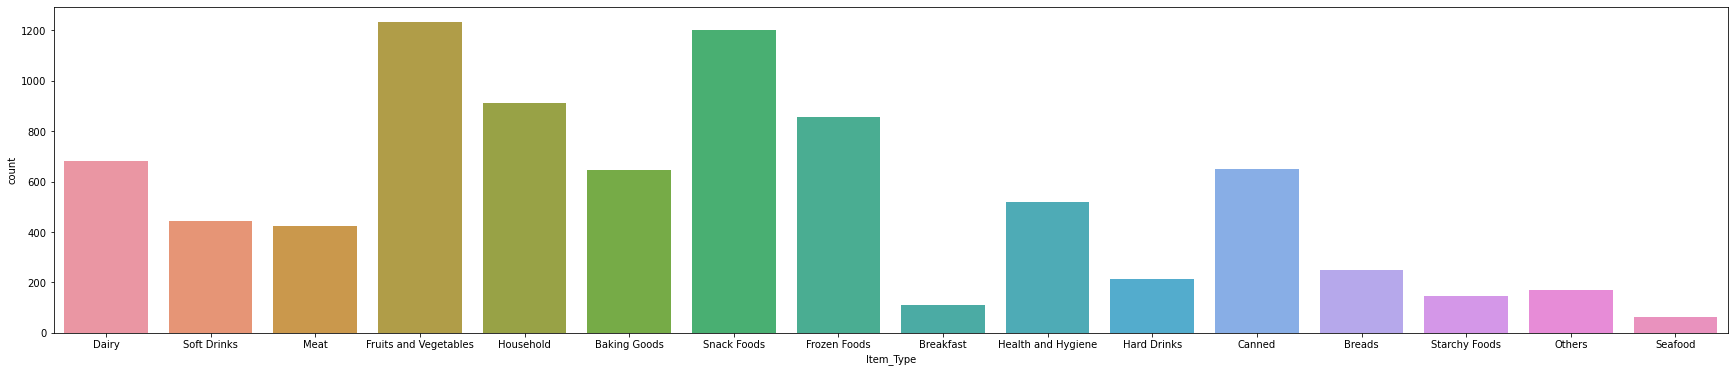

In [13]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

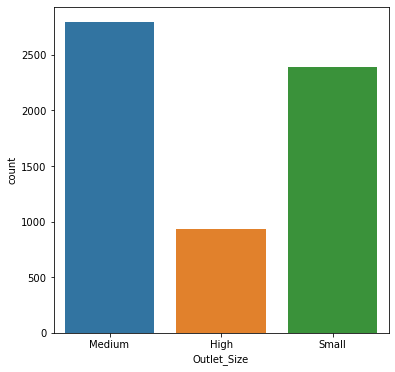

In [14]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

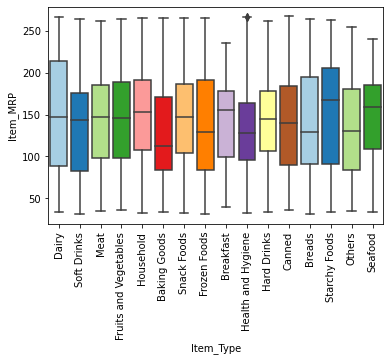

In [15]:
#Using boxplot to see the outliers in each item 
sns.boxplot(x='Item_Type',y='Item_MRP',data=data,palette='Paired',saturation=8)
plt.xticks(rotation=90)
plt.show()

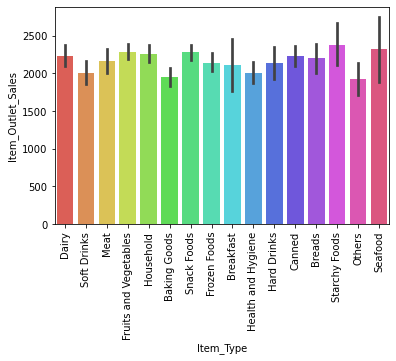

In [16]:
#item solds
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

Although Fruits & Vegetables unit sold are high, however revenue generated by seafood is much higher.

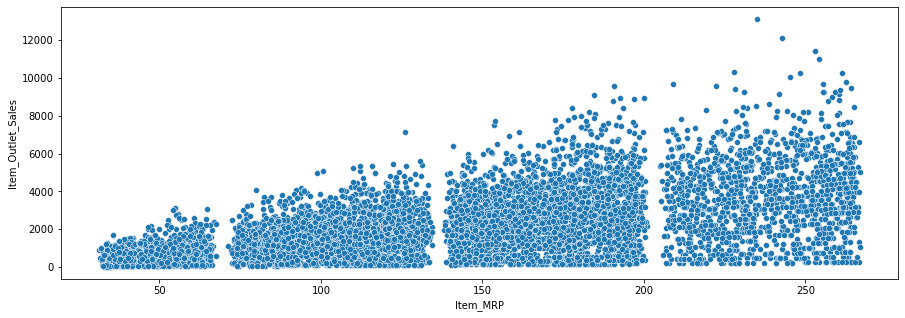

In [17]:
# We can see item_mrp is having mild positive correlaton with item_outlet_sales
plt.figure(figsize=(15,5))
sns.scatterplot(x = data['Item_MRP'], y = data['Item_Outlet_Sales'])
plt.show()
# As the MRP is high, Sales is also getting higher.

Observation : Items with highest MRP are sold maximum.

In [18]:
#Lowering the down column names
data.columns = data.columns.str.lower()

### Handling the missing values

In [19]:
#Calculating Missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
#Missing Values Imputation
group_mean_weight = data.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])

In [21]:
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [22]:
mean_weight = group_mean_weight.iloc[:,[0][0]]
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [23]:
# Function to impute Missing Value in item_weight column
def missing_value(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277
        elif item_type == "Breads":
            return 11.347
        elif item_type == "Breakfast":
            return 12.768
        elif item_type == "Canned":
            return 12.30
        elif item_type == "Dairy":
            return 13.42
        elif item_type == "Frozen Foods":
            return  12.867061
        elif item_type == "Fruits and Vegetables":
            return 13.224769
        elif item_type == "Hard Drinks":
            return 11.400328
        elif item_type == "Health and Hygiene":
            return 13.142314
        elif item_type == "Household":
            return 13.384736
        elif item_type == "Meat":
            return 12.817344
        elif item_type == "Others":
            return 13.853285
        elif item_type == "Seafood":
            return 12.552843
        elif item_type == "Snack Foods":
            return 12.987880
        elif item_type == "Soft Drinks":
            return 11.847460
        elif item_type == "Starchy Foods":
            return 13.690731
    return item_weight

In [24]:
#Imputing the missing value by using defined function
data["item_weight"] = data[["item_type","item_weight"]].apply(missing_value, axis = 1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

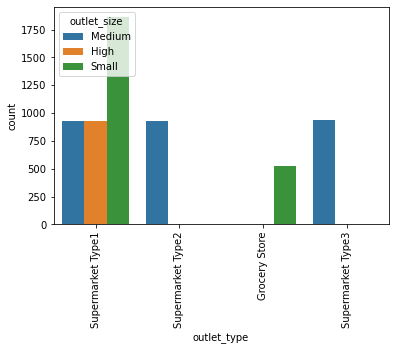

In [25]:
#Finding frequency count of outlet type
sns.countplot(data = data, x = "outlet_type",hue = "outlet_size")
plt.xticks(rotation =90)

In [26]:
#Function for Imputing Missing value in Outlet_Size column
def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size

In [27]:
#Using above defined function impute missing values in outlet size columns
data["outlet_size"] = data[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

In [28]:
#Exploring item_fat_content
data["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
data["item_fat_content"] = data["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()

In [30]:
data["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [31]:
#item_visibility has many items as 0 thus imputing with MEAN
mean_visibility = data.pivot_table(index = "item_identifier",  values = "item_visibility")

In [32]:
data.loc[(data["item_visibility"] == 0.0), "item_visibility"] = data.loc[(data["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])

In [33]:
#Replacing The Categorical Values Containing Columns
cols = ['item_identifier', 'item_fat_content','item_type', 'outlet_identifier','outlet_establishment_year', 'outlet_size', 'outlet_location_type',
        'outlet_type']

In [34]:
#Mapping each categorical column with respective frequency of the values in the columns
for i in cols:
    x  = data[i].value_counts().to_dict()
    data[i] = data[i].map(x)

In [35]:
#Resulting dataset after categorical values converted to numerical value
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


In [36]:
#Copying Data
new_data= data.copy()

<AxesSubplot:>

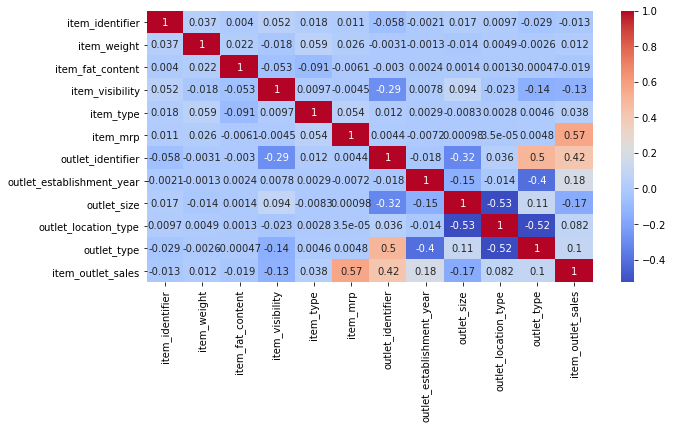

In [37]:
#Finding Correlation between each columns by using HeatMAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(), annot = True, cmap='coolwarm')

In [38]:
#Removing less correlated columns 
new_data =new_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [39]:
#Applying Logarithmic Transformation to scale
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

In [40]:
#Independent Variables
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)

### Splitting features
Testing the model on the same data as it was trained on will lead to an overfit and poor performance in real-life scenarios.
In order to avoid that, split your data into 2 pieces: train set and test set.

In [41]:
#Splitting The data  into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

### Linear Regression
Linear Regression is the basic form of regression analysis. It assumes that there is a linear relationship between the dependent variable and the predictor(s). In regression, we try to calculate the best fit line which describes the relationship between the predictors and predictive/dependent variable.

In [42]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [43]:
#Prediction
y_pred = regressor.predict(x_test)

In [44]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

0.757028146007712

In [45]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.519778744716386

In [46]:
# mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.27016994345894196

In [47]:
score=r2_score(y_test,y_pred)
score

0.757028146007712

In [48]:
# R square
regressor.score(x,y)

0.7278705742535692

### What do residuals tell us in regression?
A residual is the difference between what is plotted in your scatter plot at a specific point, and what the regression equation predicts "should be plotted" at this specific point.

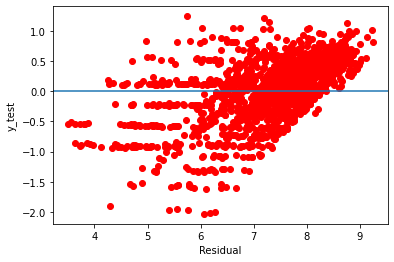

In [49]:
#Residue Linear Regression Model 
Lr = y_test - y_pred
#Residual Plot
plt.scatter(y_test,Lr, c = "red")
plt.xlabel("Residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

### Ridge and Lasso
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. 


The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [50]:
#Importing LASSO AND RIDGE from sklearn library
#Apply Lasso
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls.fit(x_train, y_train)

Lasso(alpha=0.009)

In [51]:
#prediction by LASSO model
ls_pred = ls.predict(x_test)

In [52]:
#Accuracy After Lasso(by R2_score)
r2_score(y_test,ls_pred)

0.7468491769184082

In [53]:
#Root Mean Square Error
rmse_lasso = sqrt(mean_squared_error(y_test, ls_pred))
rmse_lasso

0.5305547462917749

In [54]:
#Getting Lasso Coefficent
lasso_coeff = pd.Series(ls.coef_, index =x.columns) 

<AxesSubplot:>

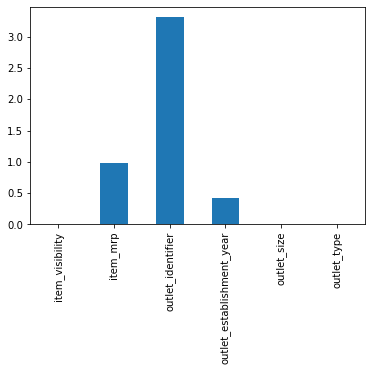

In [55]:
#Visualization of Coefficent after LASSO 
lasso_coeff.plot(kind = "bar")

In [56]:
#Reshaping the predicted values
ls_pred= ls_pred.reshape(-1,1)
ls_pred

array([[7.86649549],
       [7.45465459],
       [6.52762899],
       ...,
       [7.92350261],
       [7.03867668],
       [6.64322991]])

In [57]:
#Residue value after Lasso
residue = y_test - ls_pred

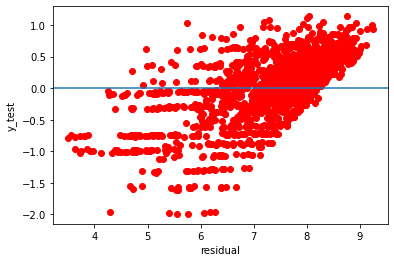

In [58]:
plt.scatter(y_test.reshape(-1,1),residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [59]:
#Ridge Regression
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [60]:
#Prediction AFTER Ridge regression
rr_pred = rr.predict(x_test)

In [61]:
#Accuracy score check
r2_score(y_test, y_pred)

0.757028146007712

In [62]:
#RMSE
rmse_ridge = sqrt(mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5197810776520827

In [63]:
#residue after ridge
residue_rr = y_test-rr_pred

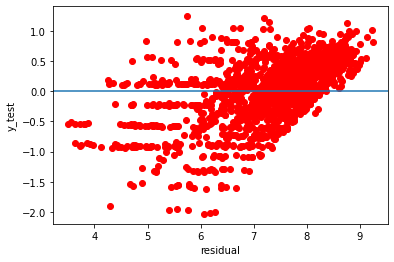

In [64]:
#plotting of residual graph after RIDGE REGRESSION
plt.scatter(y_test,residue_rr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

### Polynomial Regression
it is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial.

In [65]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import math
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
regressor_poly=LinearRegression()
regressor_poly.fit(x_poly, y_train)
from sklearn.metrics import accuracy_score
accuracy = cross_val_score(estimator=regressor_poly, X=x_train, y=y_train,cv=10)
print(f"Accuracy of Polynomial Model : \t {accuracy.mean()}")
mse=mean_squared_error(y_test,y_pred)
print('MSE of Polynomial Model :', mse)
print('RMSE of Polynomial Model :', math.sqrt(mse))

Accuracy of Polynomial Model : 	 0.7189280574508926
MSE of Polynomial Model : 0.27016994345894196
RMSE of Polynomial Model : 0.519778744716386


### ElasticNet regression
It is a combination of Ridge and LASSO regression. The loss term includes both the L1 and L2 norm of the weights with their respective scaling constants.

In [66]:
#ElasticNet 
from sklearn.linear_model import ElasticNet

In [67]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

In [68]:
scores={}
for i in alpha:
    model=ElasticNet(alpha=i)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    scores[i]=model.score(x_test,y_test)
    print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(x_test,y_test),mse,rmse,mae))

 For Alpha = 0.0001 | R-square :0.7569138856328809 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.001 | R-square :0.7556974079749537 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.01 | R-square :0.7332765026282084 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.1 | R-square :0.4410948193133757 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.3 | R-square :0.16563652712589227 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.5 | R-square :0.029613026120709818 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 1 | R-square :-0.00041204186530907627 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 10 | R-square :-0.00041204186530907627 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 


In [69]:
scores

{0.0001: 0.7569138856328809,
 0.001: 0.7556974079749537,
 0.01: 0.7332765026282084,
 0.1: 0.4410948193133757,
 0.3: 0.16563652712589227,
 0.5: 0.029613026120709818,
 1: -0.00041204186530907627,
 10: -0.00041204186530907627}

In [70]:
#get the max score and its key
max(scores, key= lambda x: scores[x])

0.0001

In [71]:
def get_best_alpha(alpha):
    for i in alpha:
        model=ElasticNet(alpha=i)
        model.fit(x_train,y_train)
        ypred=model.predict(x_test)
        mse=mean_squared_error(y_test,y_pred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(y_test,y_pred)
        scores[i]=model.score(x_test,y_test)
        print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(x_test,y_test),mse,rmse,mae))
    return max(scores, key= lambda x: scores[x])

In [72]:
print("Best Alpha is :",get_best_alpha(alpha))

 For Alpha = 0.0001 | R-square :0.7569138856328809 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.001 | R-square :0.7556974079749537 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.01 | R-square :0.7332765026282084 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.1 | R-square :0.4410948193133757 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.3 | R-square :0.16563652712589227 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 0.5 | R-square :0.029613026120709818 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 1 | R-square :-0.00041204186530907627 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
 For Alpha = 10 | R-square :-0.00041204186530907627 MSE :0.27016994345894196 RMSE :0.519778744716386 MAE:0.40732540863953337 
Best Alp

In [73]:
print('Model Score :',model.score(x_test,y_test))
print('MSE of ElasticNet Model :',mean_squared_error(y_test,y_pred))
print('MAE of ElasticNet Model :',mean_absolute_error(y_test,y_pred))
print('RMSE of ElasticNet Model :', np.sqrt(mse))

Model Score : -0.00041204186530907627
MSE of ElasticNet Model : 0.27016994345894196
MAE of ElasticNet Model : 0.40732540863953337
RMSE of ElasticNet Model : 0.519778744716386


### Conclusion
Selcting The Better Model

### 1.From above different models after applying Regressions, we can accept the model which is giving the better "RMSE SCORE" and higher accuracy (R2_SCORE).
### 2. Lasso Regression is showing the low accuracy in terms of Linear regression.
### 3. Ridge Regression is showing the similar accuracy in terms of Linear Regression.
### HENCE, ACCEPTING THE LINEAR REGRESSION MODEL